## Tarea 3
### Ejercicios del notebook 11

1.Read the data in a Pandas DataFrame, correctly setting up the index as a datetime index 

In [24]:
import pandas as pd
import numpy as np

ruta = '/home/olmo/Documents/Percepcion Remota/python clase/data/Daily_clim_data_Auckland.csv'
col_names = ['Time','rain','tmax','tmin']
df = pd.read_csv(ruta,sep=',', names=col_names, header =0)
df['Time'] = pd.to_datetime(df['Time'], dayfirst = False)            
df = df.set_index([('Time')]) 
df.head()

,rain,tmax,tmin
Time,,,
1972-01-01 12:00:00,31.6,16.8,13.5
1972-01-02 12:00:00,28.3,20.6,8.8
1972-01-03 12:00:00,10.7,15.8,8.3
1972-01-04 12:00:00,11.3,12.9,7.7
1972-01-05 12:00:00,0.0,13.2,7.0


2. Calculate monthly means for the temperature data, monthly totals for rainfall 

In [222]:
#Si es la media de cada mes para todos los años
month_m=df.resample('M').mean()
month_m

# Si es la media de cada mes en todos los años:
month_mean=df.groupby(df.index.month).mean()
month_mean['rain'] = df['rain'].groupby(df.index.month).sum() #total del mes
print month_mean

         rain       tmax      tmin
Time                              
1     18107.9  17.022350  9.626190
2     12982.7  17.337152  9.950716
3     15265.7  15.704224  9.054762
4     15075.0  13.031032  7.487540
5     16431.5  10.321352  5.565975
6     13157.0   8.092698  3.651429
7     12116.7   7.713594  3.240783
8     11891.7   8.815131  3.437711
9     14764.9  10.677302  4.513968
10    16989.3  12.387097  5.522427
11    14102.2  14.079127  6.733016
12    16302.2  15.805376  8.478418


3. Calculate and plot a climatology over the period 1981 - 2000 for all parameters 

Text(0.5,0.98,'Auckland climatology 1981-2000')

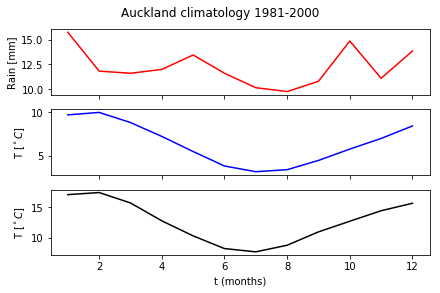

In [225]:
from matplotlib import pyplot as plt 

#Tomar el periodo deseado:
subset =df.loc[(df.index.year >=1981) & (df.index.year<= 2000)]

#Agruparlos por mes y sacar la media de cada mes:
groups = subset.groupby(subset.index.month)
climatology = groups.mean()

#Graficar:
fig,ax = plt.subplots(ncols=1,nrows=3, sharex=True, sharey=False,constrained_layout=True)
ax[0].plot(climatology.rain,'r') 
ax[0].set_ylabel('Rain [mm]')
ax[1].plot(climatology.tmin,'b') 
ax[1].set_ylabel('T [$^\circ C$]')
ax[2].plot(climatology.tmax,'k') 
ax[2].set_xlabel('t (months)')
ax[2].set_ylabel('T [$^\circ C$]')
plt.suptitle('Auckland climatology 1981-2000')

4. Calculate the anomalies WRT this climatology for all parameters 

In [147]:
def demean(x): 
    z = x - df[(df.index.year >=1981) & (df.index.year<= 2000)].mean()
    return z
anoms = subset.groupby(subset.index.month).apply(demean)
anoms.head()

,rain,tmax,tmin
Time,,,
1981-01-01 13:00:00,-12.238946,3.09666,2.592444
1981-01-02 13:00:00,7.261054,-1.70334,6.492444
1981-01-03 13:00:00,-12.238946,7.69666,4.292444
1981-01-04 13:00:00,47.661054,4.19666,3.392444
1981-01-05 13:00:00,12.161054,-2.10334,2.192444


5. Plot the time-series of minimum and maximum temperature 
6. Dig into the Scipy documentation to find how to calculate the linear trend over the period for the temperature data 
7. Calculate and plot the trend 

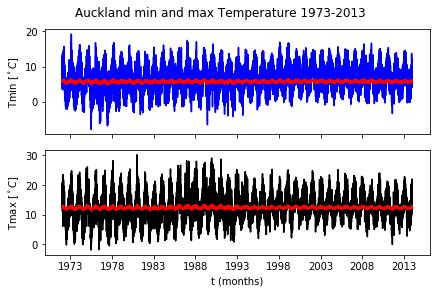

In [219]:
from scipy import stats

#Es necesario crear un array de numeros, no fechas:
x = np.linspace(df.index.day.min(),df.index.day.max(),len(df.tmin))

#Este es el orden en que la funcion devuelve los parametros:
slope, intercept, r_value, p_value, std_err = stats.linregress(x,df.tmin)

#Esta es la ecuacion de la recta a graficar:
y1= intercept + (slope*y)

fig,ax = plt.subplots(ncols=1,nrows=2, sharex=True, sharey=False,constrained_layout=True)
ax[0].plot(df.tmin,'b',ms=2) 
ax[0].plot(df.index,y1,'r')
ax[0].set_ylabel('Tmin [$^\circ C$]')

#Lo mismo pero para Tmax:
trend_vals = stats.linregress(x,df.tmax)
y3= trend_vals[1] + (trend_vals[0]*y2)
ax[1].plot(df.tmax,'k') 
ax[1].plot(df.index,y3,'r')
ax[1].set_xlabel('t (months)')
ax[1].set_ylabel('Tmax [$^\circ C$]')
plt.suptitle('Auckland min and max Temperature 1973-2013')
plt.savefig('t')